# In What Electoral System Would Donald Trump Have Won The 2020 US Election?

## Introduction

The Electoral College system has been a concrete part of the US presidential election since the founding of the country. In this system, the citizens of each state cast their votes for their choice of electors, who will cast their votes for the presidential candidates. The number of electors of each state is the sum of the number of Senates and the number of Representatives. The Electoral College consists of 538 electors in total, and each elector's vote is counted as 1 vote in the general election. In the end, the candidate who wins over the majority - which means 270 votes - wins the election. The system was created out of good intention to balance the power of small states and large states, however, criticism is getting louder after several instances in which the winner of the popular vote did not win the election due to the outcome of the Electoral College vote. This has led to questions about whether the system accurately represents the will of the US citizens and if there might be a better way to elect the President.

As the fact is that Joe Biden won in the 2020 election, the goal of the paper is to find out whether there exists any electoral system which would have allowed Donald Trump to win in the 2020 election based the original votes.

The proposed electoral systems in this paper ALL have a common presumption, that the voting unit (county or state) which will be responsible to cast ALL of its votes to one candidate. This concept, known as the "winner-take-all" principle, is similar to the existing voting system in 48 of the 50 states and Washington, D.C. in the US.

As data analysis shows that Republican voters are disproportionally located in rural areas and small cities, the 4 electoral systems proposed in the paper all put higher focus on the number of voting unit (county or state), instead of the population of voting unit (county or state). Therefore, 3 of 4 electoral systems makes Donald to win in the 2020 election.

### Variables
- Input $X_1$: Raw votes of DEM in counties
- Input $X_2$: Raw votes of REP in counties
- Input $X_3$: Raw total votes in counties
-- $X_1$, $X_2$ and $X_3$ are all vectors, each component $X_{1,i}$, $X_{2,i}$, $X_{3,i}$, where i $\in$ [1,n], represents the raw votes of DEM, the raw votes of REP and the raw total votes in a specific county, n is the count of counties.
- Output $Y_1$: Fabricated Votes of DEM in US
- Output $Y_2$: Fabricated Votes of REP in US

* **Electoral System I - Elect By County**
Each county has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of votes.
According to the Electoral System I,

$$ Y_1 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} > $X_1$), X_{3,i}, 0) $$

$$ Y_2 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} < X_{2,i}), X_{3,i}, 0) $$

* **Electoral System II - Elect By County**
Each county has one vote, it casts its vote on the party (candidate) that won the majority of votes.**
According to the Electoral System II,

$$ Y_1 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} > X_{2,i}), 1, 0) $$

$$ Y_2 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} < X_{2,i}), 1, 0) $$

* **Electoral System III - Elect By State**
Each state has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of counties.
According to the Electoral System III,

$$ Y_{1} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} > REPC_{i}), TVofState_{i}, 0) $$

$$ Y_{2} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} < REPC_{i}), TVofState_{i}, 0) $$

$$ DEMC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} (if (X_{1,j} > X_{2,j}), 1, 0) $$

$$ REPC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} ((if (X_{1,j} < X_{2,j}), 1, 0) $$

$$ TVofState_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} X3_{j} $$

* **Electoral System IV - Elect By State**
Each state has one vote, it casts its vote on the party (candidate) that won the majority of counties.
According to the Electoral System IV,

$$ Y_{1} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} > REPC_{i}), 1, 0) $$

$$ Y_{2} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} < REPC_{i}), 1, 0) $$

$$ DEMC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} (if (X_{1,j} > X_{2,j}), 1, 0) $$

$$ REPC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} (if (X_{1,j} < X_{2,j}), 1, 0) $$

## Data Cleaning/Loading

### Datasets used in this article
1. Kaggle: US Election 2020
    The information includes, states, counties, candidates, parties, and their respective votes.
2. SimpleMaps: US cities except for District of Columbia
    The information includes counties' latitude, and longitude.
3. Census Reporter: District of Columbia
    The information includes 8 Wards of District of Columbia for their latitude, and longitude.
    Note: This information was searched manually, and is manually entered onto the second dataset.

### Data Loading

In [136]:
import pandas as pd
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

*Note a wrong data in president_county_candidate.csv: Maine, Glenwood Plt., Donald Trump, corrected based on
https://www.nytimes.com/interactive/2020/11/03/us/elections/results-maine.html

In [67]:
df = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_county_candidate.csv')
df.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [68]:
df_pc = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_county.csv')
df_pc.head()

,state,county,current_votes,total_votes,percent
0,Delaware,Kent County,87025,87025,100
1,Delaware,New Castle County,287633,287633,100
2,Delaware,Sussex County,129352,129352,100
3,District of Columbia,Ward 1,41681,41681,100
4,District of Columbia,Ward 2,32881,32881,100


In [8]:
df_ps = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_state.csv')
df_ps.head()

,state,total_votes
0,Delaware,504010
1,District of Columbia,344356
2,Florida,11067456
3,Georgia,4997716
4,Hawaii,574469


In [69]:
df_geo = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/uscities.csv')
df_geo.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18680025,10768.0,shape,False,True,America/New_York,1,11229 11228 11226 11225 11224 11222 11221 1122...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12531334,3267.0,shape,False,True,America/Los_Angeles,1,91367 90291 90293 90292 91316 91311 90035 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8586888,4576.0,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,6076316,4945.0,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7935,-96.7667,5910669,1522.0,shape,False,True,America/Chicago,1,75098 75287 75230 75231 75236 75237 75235 7525...,1840019440


In [70]:
pd.set_option('display.max_columns', None)

### Data Cleaning

1. Remove the rows of US Election 2020 where the candidate did not win.

In [71]:
df['county'] = df['county'].str.replace(' County', '')
df_pc['county'] = df_pc['county'].str.replace(' County', '')

2. Match the geographical coordinates with votes.



In [72]:
df_copy = df.copy()
df_pc_copy = df_pc.copy()

df_geo_copy = df_geo.copy()
df_geo_copy.drop(['city', 'city_ascii', 'state_id', 'county_fips', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id', 'population', 'density'], axis = 1, inplace = True)
df_geo_copy.rename(columns={"state_name": "state", "county_name": "county"}, inplace = True)
df_geo_copy.drop_duplicates(subset = ['state', 'county'], keep = 'first', inplace = True)
df_geo_pop = df_geo.copy()
df_geo_pop.drop(['city', 'city_ascii', 'state_id', 'county_fips', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id'], axis = 1, inplace = True)
df_geo_pop.rename(columns={"state_name": "state", "county_name": "county"}, inplace = True)
df_geo_pop.drop_duplicates(subset = ['state', 'county'], keep = 'first', inplace = True)

df_county_statistics = pd.merge(df_copy, df_geo_copy, on=['county', 'state'], how = 'left')
df_pc_copy.drop(['total_votes', 'percent'], axis = 1, inplace = True)
df_county = df_county_statistics.copy()
df_county.drop(df_copy[df_copy['won'] == False].index, inplace = True)
df_county.reset_index(inplace=True)
df_county['total_votes'] = df_pc_copy['current_votes']
df_county.drop(['index'], axis = 1, inplace = True)
df_county.head()

,state,county,candidate,party,total_votes,won,lat,lng
0,Delaware,Kent,Joe Biden,DEM,87025,True,39.1610,-75.5202
1,Delaware,New Castle,Joe Biden,DEM,287633,True,39.7415,-75.5416
2,Delaware,Sussex,Donald Trump,REP,129352,True,38.9091,-75.4227
3,District of Columbia,Ward 1,Joe Biden,DEM,41681,True,38.9072,-77.0369
4,District of Columbia,Ward 2,Joe Biden,DEM,32881,True,38.9063,-77.0340


Calculating data for summary statistics table. ->

In [73]:
df_county_won = df_county.copy()
df_county_won.drop(df_county_won[df_county_won['candidate'] != 'Donald Trump'].index, inplace = True)
df_county_won.drop(['lat', 'lng'], axis = 1, inplace = True)
df_county_won.rename(columns={"total_votes": "county_total_votes"}, inplace = True)
df_county_won = pd.merge(df_county_won, df_copy, on=['county', 'state', 'candidate', 'party', 'won'], how='left')
df_county_won.rename(columns={"total_votes": "won_votes"}, inplace = True)
df_county_won = df_county_won[['state', 'county', 'candidate', 'party', 'won', 'won_votes', 'county_total_votes']]
df_county_won['share of votes in the winning counties'] = \
    df_county_won['won_votes'] / df_county_won['county_total_votes']
df_county_won.head()

,state,county,candidate,party,won,won_votes,county_total_votes,share of votes in the winning counties
0,Delaware,Sussex,Donald Trump,REP,True,71230,129352,0.550668
1,Florida,Baker,Donald Trump,REP,True,11911,14059,0.847215
2,Florida,Bay,Donald Trump,REP,True,66097,93024,0.710537
3,Florida,Bradford,Donald Trump,REP,True,10334,13632,0.758069
4,Florida,Brevard,Donald Trump,REP,True,207883,360764,0.576230


In [74]:
df_county_lost = df_county_statistics.copy()
df_county_lost.drop(df_copy[df_copy['won'] == True].index, inplace = True)
df_county_lost.drop(df_county_lost[df_county_lost['candidate'] != 'Donald Trump'].index, inplace = True)
df_county_lost.drop(['lat', 'lng'], axis = 1, inplace = True)
df_county_lost.reset_index(inplace=True)
df_county_lost.rename(columns={"total_votes": "won_votes"}, inplace = True)
df_county_lost = pd.merge(df_county_lost, df_pc_copy, on = ['state', 'county'], how = 'left')
df_county_lost.rename(columns={"current_votes": "county_total_votes"}, inplace = True)
df_county_lost.drop(['index'], axis = 1, inplace = True)
df_county_lost = df_county_lost[['state', 'county', 'candidate', 'party', 'won', 'won_votes', 'county_total_votes']]
df_county_lost['share of votes in the losing counties'] =\
    df_county_lost['won_votes'] / df_county_lost['county_total_votes']
df_county_lost.head()

,state,county,candidate,party,won,won_votes,county_total_votes,share of votes in the losing counties
0,Delaware,Kent,Donald Trump,REP,False,41009,87025,0.471232
1,Delaware,New Castle,Donald Trump,REP,False,88364,287633,0.307211
2,District of Columbia,Ward 1,Donald Trump,REP,False,1725,41681,0.041386
3,District of Columbia,Ward 2,Donald Trump,REP,False,2918,32881,0.088744
4,District of Columbia,Ward 3,Donald Trump,REP,False,3705,44231,0.083765


For Electoral System I and II, in which the county is the vote casting level, data cleaning is done. They share the same dataframe for plotting purposes.

For Electoral System III and IV, in which the state is the vote casting level, continue the following steps:

3. Calculate the number of counties won by each candidate in each state.

In [75]:
df_state = df_copy.groupby(["state", "candidate", "party"]).sum(numeric_only = True)
df_state.rename(columns={"won": "# of counties won"}, inplace = True)
df_state.index = [df_state.index.get_level_values(0),
                  df_state.index.get_level_values(1),
                  df_state.index.get_level_values(2)]
df_state = df_state.reset_index() \
       .sort_values(['state','# of counties won'], ascending=[True,False]) \
       .set_index(['state','party'])
df_state.drop(['total_votes'], axis = 1, inplace = True)
df_state.head()

candidate  # of counties won
state   party                                 
Alabama REP    Donald Trump                 54
        DEM       Joe Biden                 13
        WRI       Write-ins                  0
        LIB    Jo Jorgensen                  0
Alaska  REP    Donald Trump                 20

4. Keep the candidate of the highest voting only.

In [76]:
df_state1 = df_state.copy()
df_state1.reset_index(inplace=True)
df_state1.drop_duplicates(
  subset = ['state'],
  keep = 'first', inplace = True)
df_state1 = df_state1.reset_index(drop=True)
df_state1.head()

,state,party,candidate,# of counties won
0,Alabama,REP,Donald Trump,54
1,Alaska,REP,Donald Trump,20
2,Arizona,REP,Donald Trump,10
3,Arkansas,REP,Donald Trump,67
4,California,DEM,Joe Biden,35


5. Replace ALL candidates and parties' name by the winner of each state, because now all the votes of a state belongs to the winner.

In [77]:
df_state2 = df_county.copy()
df_state2.drop(['candidate'], axis = 1, inplace = True)
df_state2.drop(['party'], axis = 1, inplace = True)
df_state2 = pd.merge(df_state2, df_state1, on = 'state', how = 'left')
df_state2.head()

,state,county,total_votes,won,lat,lng,party,candidate,# of counties won
0,Delaware,Kent,87025,True,39.1610,-75.5202,DEM,Joe Biden,2
1,Delaware,New Castle,287633,True,39.7415,-75.5416,DEM,Joe Biden,2
2,Delaware,Sussex,129352,True,38.9091,-75.4227,DEM,Joe Biden,2
3,District of Columbia,Ward 1,41681,True,38.9072,-77.0369,DEM,Joe Biden,8
4,District of Columbia,Ward 2,32881,True,38.9063,-77.0340,DEM,Joe Biden,8


*Need to Improve*
*Some counties' latitude and longitude are still missing, will find other datasets to fill the vacancies.*

Summary statistics table for III and IV ->

In [78]:
df_state_statistics = df_state1.copy()
df_state_total = df_state.groupby(level=[0]).sum(numeric_only = True)
df_state_total.rename(columns={"# of counties won": "# of total counties"}, inplace = True)
df_state_statistics = pd.merge(df_state_statistics, df_state_total, on = 'state', how = 'left')
df_state_statistics.head()

,state,party,candidate,# of counties won,# of total counties
0,Alabama,REP,Donald Trump,54,67
1,Alaska,REP,Donald Trump,20,40
2,Arizona,REP,Donald Trump,10,15
3,Arkansas,REP,Donald Trump,67,75
4,California,DEM,Joe Biden,35,58


In [79]:
df_state_won = df_state_statistics.copy()
df_state_won.drop(df_state_won[df_state_won['candidate'] != 'Donald Trump'].index, inplace = True)
df_state_won['share of counties in the winning states'] = \
    df_state_won['# of counties won'] / df_state_won['# of total counties']
df_state_won['won'] = True
df_state_won = df_state_won[['state', 'candidate', 'party', 'won', '# of counties won', '# of total counties', 'share of counties in the winning states']]
df_state_won.head()

,state,candidate,party,won,# of counties won,# of total counties,share of counties in the winning states
0,Alabama,Donald Trump,REP,True,54,67,0.805970
1,Alaska,Donald Trump,REP,True,20,40,0.500000
2,Arizona,Donald Trump,REP,True,10,15,0.666667
3,Arkansas,Donald Trump,REP,True,67,75,0.893333
5,Colorado,Donald Trump,REP,True,40,64,0.625000


In [80]:
df_state_lost = df_state1.copy()
df_state_lost.drop(df_state_lost[df_state_lost['candidate'] == 'Donald Trump'].index, inplace = True)
df_state_lost.drop(['party', 'candidate', '# of counties won'], axis = 1, inplace = True)
df_state_lost = pd.merge(df_state_lost, df_state, on = ['state'], how = 'left')
df_state_lost.drop(df_state_lost[df_state_lost['candidate'] != 'Donald Trump'].index, inplace = True)
df_state_lost = pd.merge(df_state_lost, df_state_total, on = ['state'], how = 'left')
df_state_lost['share of counties in the losing states'] = \
    df_state_lost['# of counties won'] / df_state_lost['# of total counties']
df_state_lost['won'] = False
df_state_lost['party'] = 'REP'
df_state_lost = df_state_lost[['state', 'candidate', 'party', 'won', '# of counties won', '# of total counties', 'share of counties in the losing states']]
df_state_lost

,state,candidate,party,won,# of counties won,# of total counties,share of counties in the losing states
0,California,Donald Trump,REP,False,23,58,0.396552
1,Connecticut,Donald Trump,REP,False,54,169,0.319527
2,Delaware,Donald Trump,REP,False,1,3,0.333333
3,District of Columbia,Donald Trump,REP,False,0,8,0.000000
4,Hawaii,Donald Trump,REP,False,0,4,0.000000
5,Massachusetts,Donald Trump,REP,False,53,351,0.150997
6,New Jersey,Donald Trump,REP,False,7,21,0.333333
7,Rhode Island,Donald Trump,REP,False,11,39,0.282051
8,Vermont,Donald Trump,REP,False,45,246,0.182927


## Summary Statistics Tables

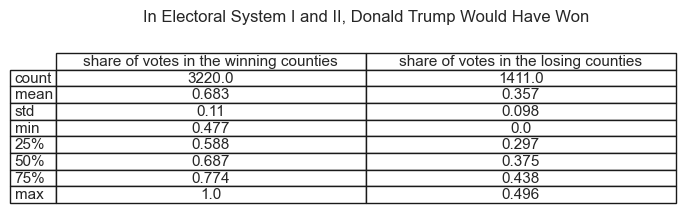

In [81]:
df_I_II_statistics = pd.DataFrame({
    "share of votes in the winning counties" : df_county_won['share of votes in the winning counties'].describe(),
    "share of votes in the losing counties" : df_county_lost['share of votes in the losing counties'].describe(),
})
df_I_II_statistics = df_I_II_statistics.round(decimals = 3)
fig=plt. figure (figsize = (8, 0.3))
ax = fig.add_subplot(111)
ax.table(cellText = df_I_II_statistics.values, colLabels = df_I_II_statistics.columns,
         rowLabels = df_I_II_statistics.index, cellLoc = 'center')
ax.set_title ("In Electoral System I and II, Donald Trump Would Have Won")
ax.axis ('off')
plt.show()

The above summary statistics table presented the basic information about Electoral System I and II. Let's revisit the definition of the two electoral systems. For electoral system I, each county has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of votes. For electoral system II, each county has one vote, it casts its vote on the party (candidate) that won the majority of votes. Both electoral systems share a same characteristic, that is the decision-making level is at the county. Therefore, systematically speaking, there exists a great potential for the counties with large population to overstep the ones with less population, which is not beneficial to the Republican policy. The gap between the two 50%-data is about 31%, keep this data in mind, and we will compare it with the next table.

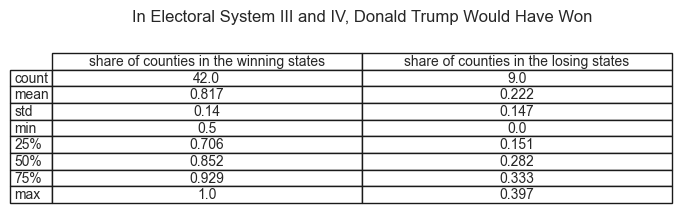

In [82]:
df_III_IV_statistics = pd.DataFrame({
    "share of counties in the winning states": df_state_won['share of counties in the winning states'].describe(),
    "share of counties in the losing states": df_state_lost['share of counties in the losing states'].describe(),
})
df_III_IV_statistics = df_III_IV_statistics.round(decimals = 3)
fig2 = plt.figure(figsize = (8, 0.3))
ax2 = fig2.add_subplot(111)
ax2.table(cellText = df_III_IV_statistics.values, colLabels = df_III_IV_statistics.columns,
         rowLabels = df_III_IV_statistics.index, cellLoc = 'center')
ax2.set_title("In Electoral System III and IV, Donald Trump Would Have Won")
ax2.axis ('off')
plt.show()

The above summary statistics table presented the basic information about Electoral System III and IV. Let's revisit the definition of the two electoral systems. For electoral system III, each state has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of counties. For electoral system IV, Each state has one vote, it casts its vote on the party (candidate) that won the majority of counties. Both electoral systems here also share a same characteristic, that is the decision-making level is at the state. Therefore, systematically speaking, no matter how many votes the Democrat receives at the large counties, it only counts as 1 vote per county at the state level. As a result, the advantage of Trump being popular with smaller counties is now fully exploited. The gap between the two 50%-data is about 57%, which is almost a double of the 31% from the above, which proves the previous reasoning.

## Plots, Histograms, Figures
### County Level Analysis
#### Favor for Trump in Smaller Counties
It is a well-known statement that Trump is more popular in the rural places, to test this statement, the following is a plot with Trump's share of votes against the total amount of votes in every county.

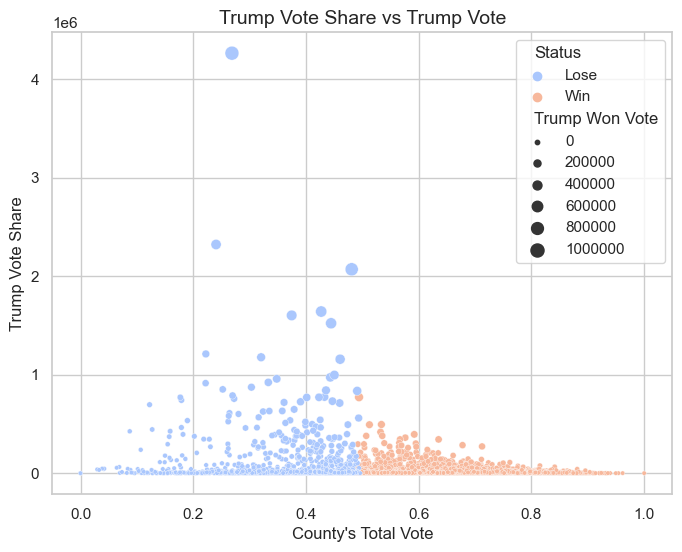

In [83]:
df_county_plot = df_county_won.copy()
df_county_plot.rename(columns={'share of votes in the winning counties': 'trump_vote_share'}, inplace = True)
df_county_plot1 = df_county_lost.copy()
df_county_plot1.rename(columns={'share of votes in the losing counties': 'trump_vote_share'}, inplace = True)
df_county_plot = pd.concat([df_county_plot, df_county_plot1])
plt.figure(figsize = (8,6))
sns.scatterplot(data = df_county_plot, x = "trump_vote_share", y = 'county_total_votes', hue = "won", size = "won_votes", palette = "coolwarm", sizes=(10,100))

legend_labels = plt.gca().get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Status")
    if i == 1:
        label.set_text("Lose")
    if i == 2:
        label.set_text("Win")
    if i == 3:
        label.set_text("Trump Won Vote")

plt.title("Trump Vote Share vs Trump Vote", fontdict={'family': 'sans-serif', 'size': 14})
plt.xlabel("County's Total Vote", fontdict={'family': 'sans-serif', 'size': 12, 'weight': 'normal'})
plt.ylabel("Trump Vote Share", fontdict={'family': 'sans-serif', 'size': 12, 'weight': 'normal'})
#plt.tick_params(axis="both", which="major", labelsize=12)
plt.show()

In the above scatterplot, we see two triangle shape of blue and red color dots standing back to back with each other. The red triangle is where Trump won the voting in the county, and the blue triangle is where Trump had lost the county election to another candidate, in this year we are mostly talking about Joe Biden. From the distribution of the dots, we see a denser cluster of dots on the bottom of the red side where Trump won in the county. And at the same time, the height of the blue triangle is much higher than the peak on the red. This indicates that Trump was more popular in the small counties, cities than he was in the large counties, cities, which accords with the popular statement that he is more favored in rural places where counties are small.

#### Participation Rate Versus Population
Since we have proved that Trump's support rate is strongly related with the size of the county, other variables related to population and voting are also worthwhile to included. Participation rate is another significant factor of how many votes can a county generate, it matters to not only the Republicans but to all parties in the United States. Here the participation rate means the percentage of people who voted (county_total_votes) in the total population within a county.

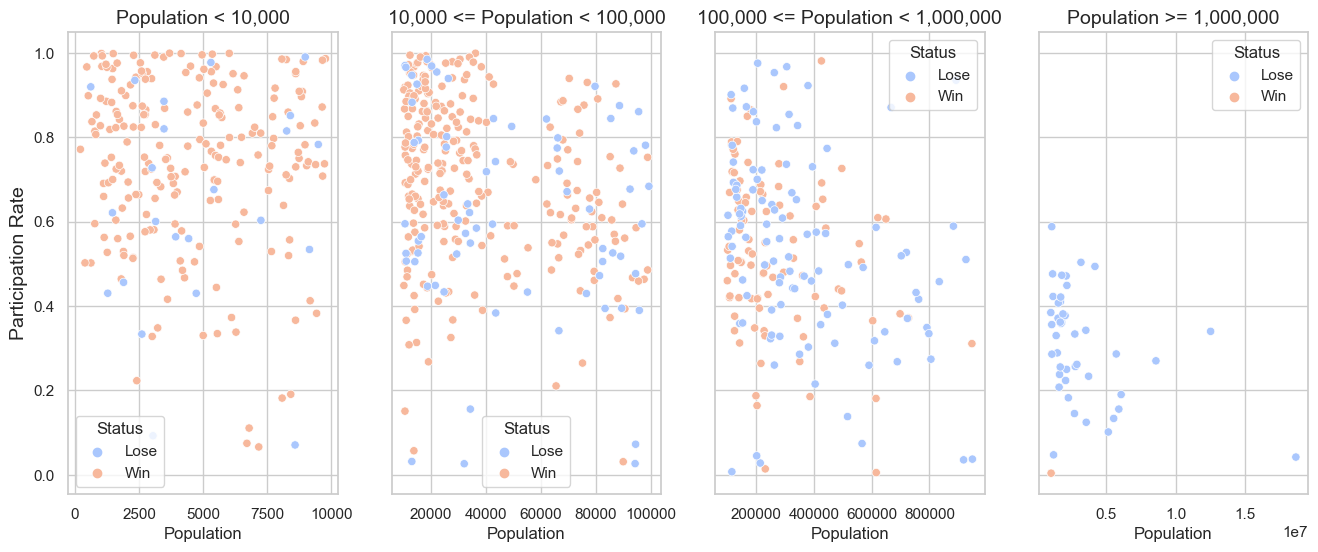

In [84]:
df_county_pop = pd.merge(df_county_plot, df_geo_pop, on = ['state', 'county'])
df_county_pop.drop(df_county_pop[df_county_pop['population'] < df_county_pop['county_total_votes']].index, inplace = True)
df_county_pop['participation_rate'] = df_county_pop['county_total_votes'] / df_county_pop['population']

df_county_pop1 = df_county_pop.copy()
df_county_pop1.drop(df_county_pop1[df_county_pop1['population'] >= 10000].index, inplace = True)
df_county_pop2 = df_county_pop.copy()
df_county_pop2.drop(df_county_pop2[df_county_pop2['population'] < 10000].index, inplace = True)
df_county_pop2.drop(df_county_pop2[df_county_pop2['population'] >= 100000].index, inplace = True)
df_county_pop3 = df_county_pop.copy()
df_county_pop3.drop(df_county_pop3[df_county_pop3['population'] < 100000].index, inplace = True)
df_county_pop3.drop(df_county_pop3[df_county_pop3['population'] >= 1000000].index, inplace = True)
df_county_pop4 = df_county_pop.copy()
df_county_pop4.drop(df_county_pop4[df_county_pop4['population'] < 1000000].index, inplace = True)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 6), sharey=True)
sns.scatterplot(data=df_county_pop1, x="population", y='participation_rate', hue = "won", palette = "coolwarm", ax = ax1)
ax1.set_title("Population < 10,000", fontsize=14)
ax1.set_xlabel("Population", fontsize=12)
sns.scatterplot(data=df_county_pop2, x="population", y='participation_rate', hue = "won", palette = "coolwarm", ax = ax2)
ax2.set_title("10,000 <= Population < 100,000", fontsize=14)
ax2.set_xlabel("Population", fontsize=12)
sns.scatterplot(data=df_county_pop3, x="population", y='participation_rate', hue = "won", palette = "coolwarm", ax = ax3)
ax3.set_title("100,000 <= Population < 1,000,000", fontsize=14)
ax3.set_xlabel("Population", fontsize=12)
sns.scatterplot(data=df_county_pop4, x="population", y='participation_rate', hue = "won", palette = "coolwarm", ax = ax4)
ax4.set_title("Population >= 1,000,000", fontsize=14)
ax4.set_xlabel("Population", fontsize=12)

ax1.set_ylabel("Participation Rate", fontsize=14)

axes = [ax1, ax2, ax3, ax4]
for j in range(len(axes)):
    legend_labels = axes[j].get_legend().get_texts()
    for i, label in enumerate(legend_labels):
        if i == 0:
            label.set_text("Lose")
        if i == 1:
            label.set_text("Win")
    axes[j].get_legend().set_title("Status")

plt.show()

The above 4 scatterplots hold population against participation rate in a continuous manner. What we can see from the pattern is that, in general the higher the population, the lower the participation rate. In the first plot where population is under 10000, the pattern of decreasing participation rate is not very obvious. However, starting from the second plot, the distribution of the plots clearing went downward sloping. By differentiating counties where Trump won or lost, we see that there is no much divergence between distribution of the red dots and the blue dots. Participation rate behaves almost the same way in both conditions.

#### Participation Rate Versus Density
After we analyzed the relationship between participation rate and population, it is easy to think of how the other population variable, density, plays out with the participation rate.

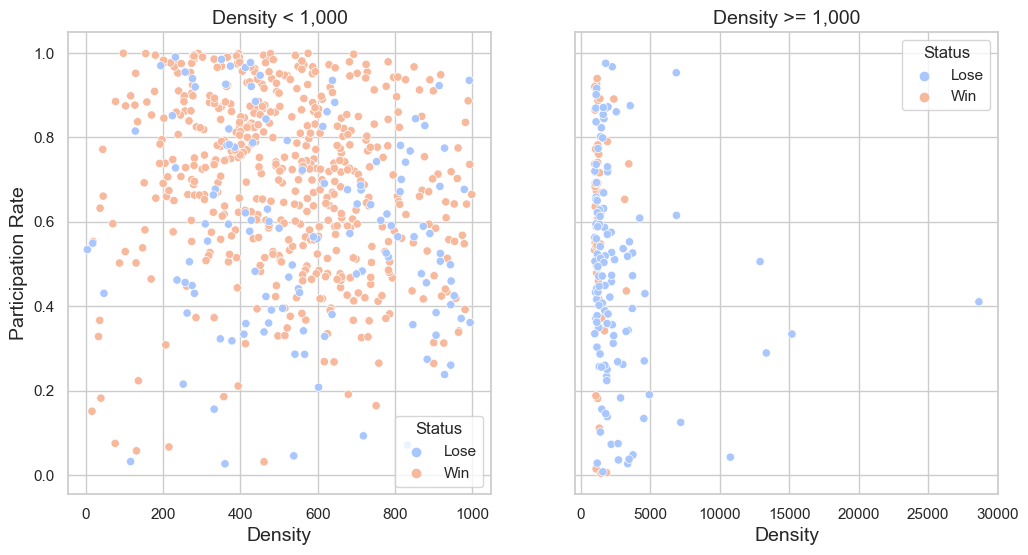

In [85]:
df_county_density1 = df_county_pop.copy()
df_county_density1.drop(df_county_density1[df_county_density1['density'] >= 1000].index, inplace = True)
df_county_density2 = df_county_pop.copy()
df_county_density2.drop(df_county_density2[df_county_density2['density'] < 1000].index, inplace = True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.scatterplot(data=df_county_density1, x="density", y='participation_rate', hue = "won", palette = "coolwarm", ax = ax1)
sns.scatterplot(data=df_county_density2, x="density", y='participation_rate', hue = "won", palette = "coolwarm", ax = ax2)
ax1.set_ylabel("Participation Rate", fontsize=14)
ax1.set_title("Density < 1,000", fontsize=14)
ax2.set_title("Density >= 1,000", fontsize=14)
ax1.set_xlabel("Density", fontsize=14)
ax2.set_xlabel("Density", fontsize=14)

axes = [ax1, ax2, ax3, ax4]
for j in range(len(axes)):
    legend_labels = axes[j].get_legend().get_texts()
    for i, label in enumerate(legend_labels):
        if i == 0:
            label.set_text("Lose")
        if i == 1:
            label.set_text("Win")
    axes[j].get_legend().set_title("Status")

plt.show()

Surprisingly, not much correlation between participation rate and density is exhibited in the above plots. Although the thought of Trump being not favored in the places where population density is high comes naturally from the previous section of scatterplot, it is noteable that Trump not being popular in the populated counties does not necessarily mean he is not popular in the dense counties. In other words, Trump could possibly has the same chance to win a small but dense county as Biden does.

#### Trump Vote Share Versus Latitude
Geographical elements is also another interesting aspect of the US politics. By putting the share of Trump votes against Latitude, the plot is reorganizing the US map by the East-West direction, the counties that Trump had won is on the left, the counties that Trump had lost is on the right side. North counties are still in the north, south counties are still in the south.

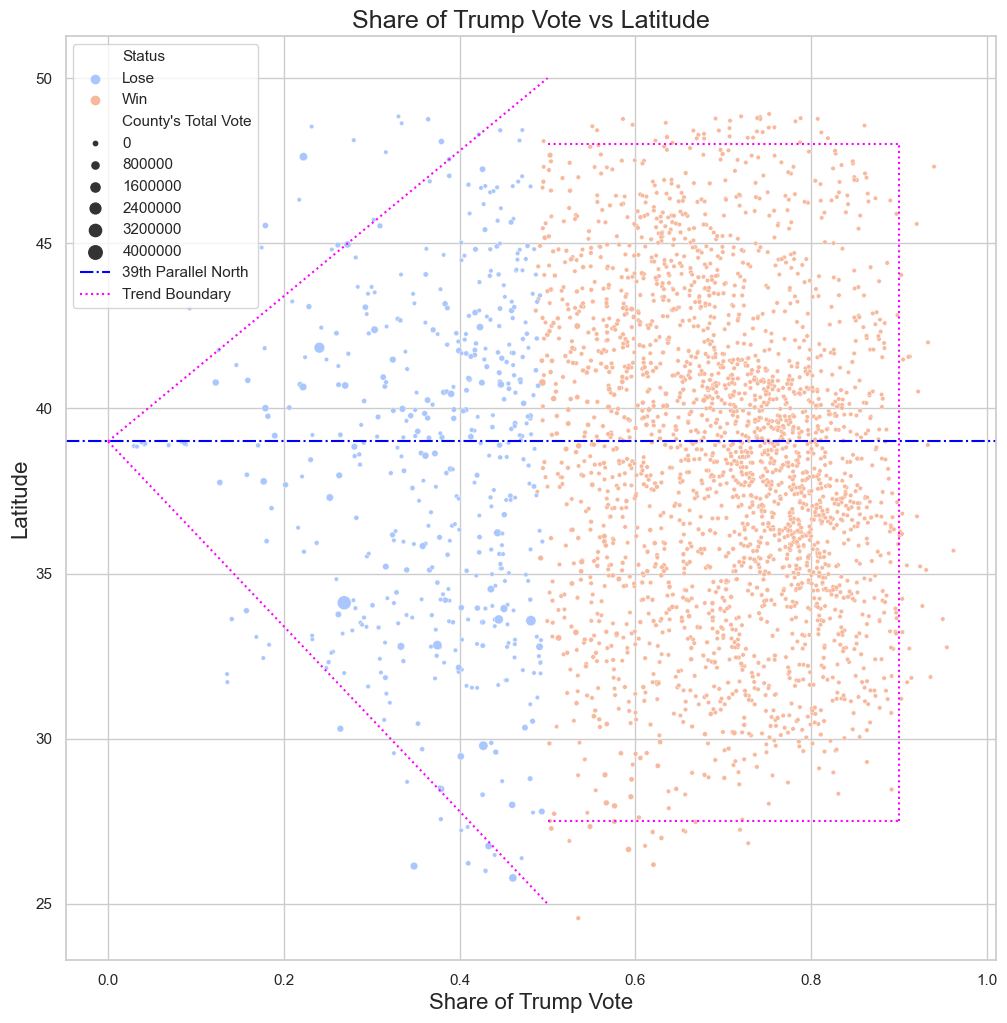

In [86]:
df_county_geo = df_county.copy()
df_county_geo.drop(['candidate', 'party', 'won', 'total_votes'], axis = 1, inplace = True)
df_county_geo = pd.merge(df_county_plot, df_county_geo, on = ['state', 'county'], how = 'left')
df_county_geo = df_county_geo[~df_county_geo["state"].isin(["Alaska", "Hawaii"])]
plt.figure(figsize=(12, 12))
sns.scatterplot(data=df_county_geo, x="trump_vote_share",
                y='lat', hue="won", size="county_total_votes",
                palette="coolwarm", sizes=(10, 100))

plt.axhline(y=39, color='blue', linestyle='dashdot', label='39th Parallel North')
plt.legend()

plt.title("Share of Trump Vote vs Latitude", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Share of Trump Vote", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.plot([0, 0.5], [39, 25], color="magenta", linestyle=':')
plt.plot([0, 0.5], [39, 50], color="magenta", linestyle=':')
plt.plot([0.9, 0.9], [27.5, 48], color="magenta", linestyle=':')
plt.plot([0.5, 0.9], [48, 48], color="magenta", linestyle=':')
plt.plot([0.5, 0.9], [27.5, 27.5], color="magenta", linestyle=':', label='Trend Boundary')
plt.legend()

legend_labels = plt.gca().get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Status")
    if i == 1:
        label.set_text("Lose")
    if i == 2:
        label.set_text("Win")
    if i == 3:
        label.set_text("County's Total Vote")

plt.show()

By looking at the shape we can see that on the red side where Trump had won, the dots are distributed evenly throughout on both sides of 39th parallel north. It indicates that, if Trump wins the county, the likelihood of it locating at any latitude is random, and the advantage that Trump has over his winning is also random.

Whereas on the blue side where Trump had lost, the shape of the distribution exhibits a distinctive convergence on the left side. This shows that for a county that Trump loses at a weak disadvantage, it is more likely to be located at the north or south, but not at the center.

In [27]:
df_county_geo[df_county_geo.trump_vote_share<0.1]

,state,county,candidate,party,won,won_votes,county_total_votes,trump_vote_share,lat,lng
3222,District of Columbia,Ward 1,Donald Trump,REP,False,1725,41681,0.041386,38.9072,-77.0369
3223,District of Columbia,Ward 2,Donald Trump,REP,False,2918,32881,0.088744,38.9063,-77.0340
3224,District of Columbia,Ward 3,Donald Trump,REP,False,3705,44231,0.083765,38.9884,-77.0900
3225,District of Columbia,Ward 4,Donald Trump,REP,False,1913,45296,0.042233,38.9310,-77.0380
3226,District of Columbia,Ward 5,Donald Trump,REP,False,1769,46107,0.038367,38.9717,-77.0089
3227,District of Columbia,Ward 6,Donald Trump,REP,False,4337,62918,0.068931,38.8869,-76.9896
3228,District of Columbia,Ward 7,Donald Trump,REP,False,1134,38384,0.029544,38.8582,-76.9478
3229,District of Columbia,Ward 8,Donald Trump,REP,False,1085,32858,0.033021,38.8409,-76.9859
3329,Maine,Hersey,Donald Trump,REP,False,0,42,0.000000,NaN,NaN
3477,Maryland,Prince George's,Donald Trump,REP,False,37090,424855,0.087300,38.9549,-76.7406


By listing out all counties where Trump's vote share is smaller than 10%, we can see that the District of Columbia and Massachusetts are outstanding outliers among all districts with their exceptionally low support rate for Trump.

#### Trump Vote Share Versus Longitude
After the analysis on latitude, it is also important to investigate the variable, longitude. For this graph, I put longitude on the x-axis, so it aligns with the actual map. The plot reorganized the US map by the North-South direction, the counties that Trump had won is on the top, the counties that Trump had lost is on the bottom. East counties are still in the east, west counties are still in the west.

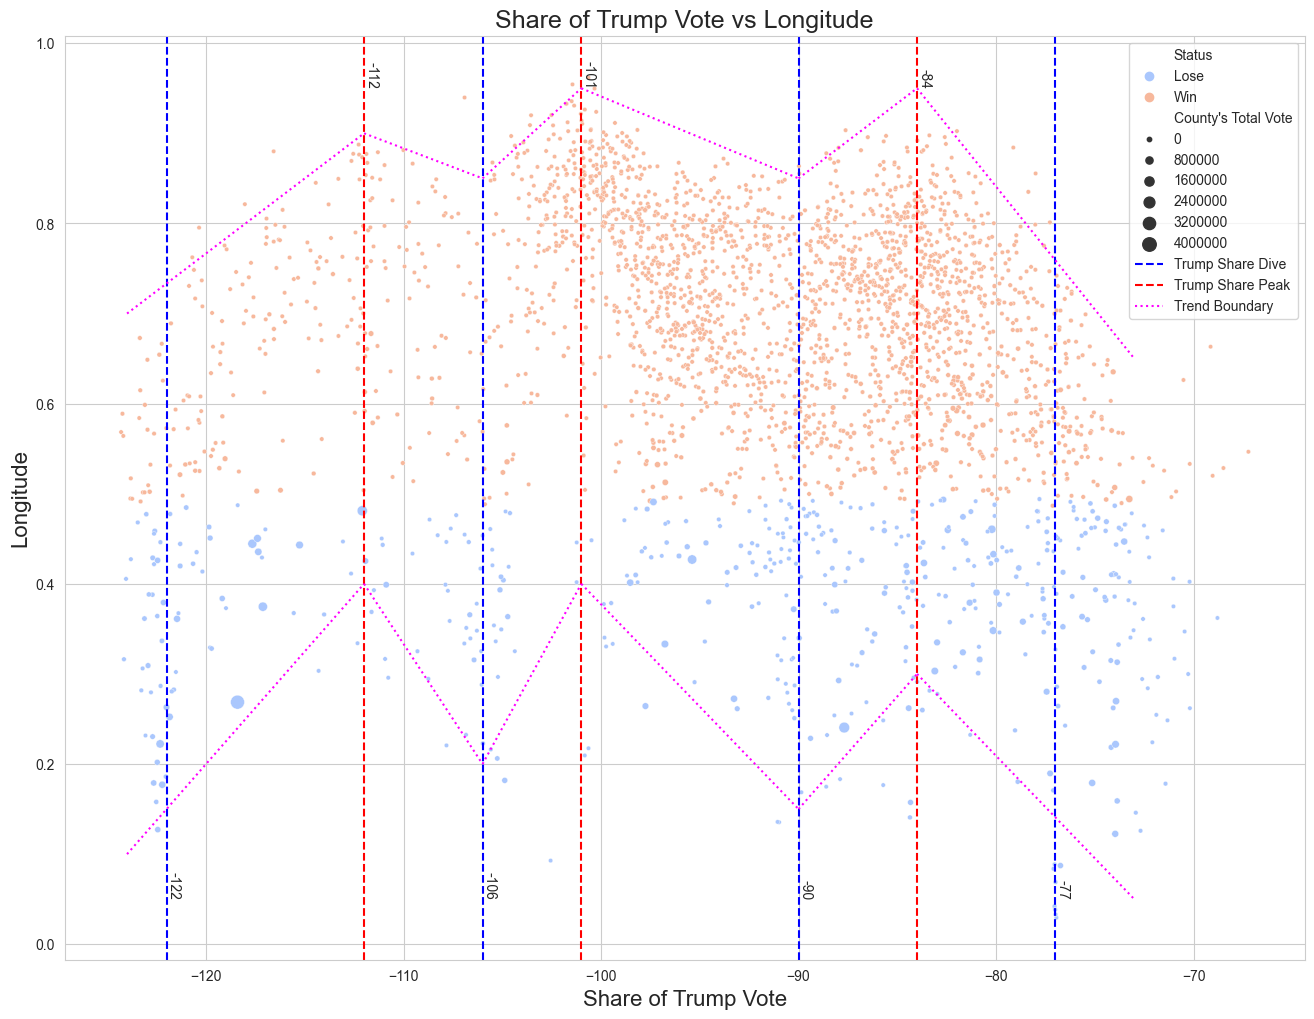

In [28]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df_county_geo, x="lng",
                y='trump_vote_share', hue="won", size="county_total_votes",
                palette="coolwarm", sizes=(10, 100))
plt.axvline(x=-122, color='blue', linestyle='dashed', label='Trump Share Dive')
plt.legend()
plt.text(-122, 0.05, '-122', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-112, color='red', linestyle='dashed', label='Trump Share Peak')
plt.legend()
plt.text(-112, 0.95, '-112', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-106, color='blue', linestyle='dashed')
plt.text(-106, 0.05, '-106', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-101, color='red', linestyle='dashed')
plt.text(-101, 0.95, '-101', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-90, color='blue', linestyle='dashed')
plt.text(-90, 0.05, '-90', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-84, color='red', linestyle='dashed')
plt.text(-84, 0.95, '-84', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-77, color='blue', linestyle='dashed')
plt.text(-77, 0.05, '-77', rotation=-90, va='bottom', ha='left')

plt.plot([-124, -112], [0.1, 0.4], color="magenta", linestyle=':', label='Trend Boundary')
plt.legend()
plt.plot([-124, -112], [0.7, 0.9], color="magenta", linestyle=':')
plt.plot([-112, -106], [0.4, 0.2], color="magenta", linestyle=':')
plt.plot([-112, -106], [0.9, 0.85], color="magenta", linestyle=':')
plt.plot([-106, -101], [0.2, 0.4], color="magenta", linestyle=':')
plt.plot([-106, -101], [0.85, 0.95], color="magenta", linestyle=':')
plt.plot([-101, -90], [0.4, 0.15], color="magenta", linestyle=':')
plt.plot([-101, -90], [0.95, 0.85], color="magenta", linestyle=':')
plt.plot([-90, -84], [0.15, 0.3], color="magenta", linestyle=':')
plt.plot([-90, -84], [0.85, 0.95], color="magenta", linestyle=':')
plt.plot([-84, -73], [0.3, 0.05], color="magenta", linestyle=':')
plt.plot([-84, -73], [0.95, 0.65], color="magenta", linestyle=':')
plt.legend()

legend_labels = plt.gca().get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Status")
    if i == 1:
        label.set_text("Lose")
    if i == 2:
        label.set_text("Win")
    if i == 3:
        label.set_text("County's Total Vote")

plt.title("Share of Trump Vote vs Longitude", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Share of Trump Vote", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})

plt.show()

As from the graph, we see a very interesting pattern of distribution. Starting from the farthest west (lng -125), the general votes are relatively unfavored of Donald Trump; then we move sightly to the east (lng -112), we see a local peak; we continue to move forward to east (lng -106), we see a local dive; etc. At the end, we actually have 4 dives in total, and 3 peaks in between them. This means that the Trump's vote share follows a wave-like movement on from west to east.

#### Geographical Distribution of Trump Share Votes
By combining the latitude and longitude graph together, we have the following map for Trump share of votes on the US mainland, where the blue lines represent areas with lower Trump share, and the red lines represent areas with higher Trump share.

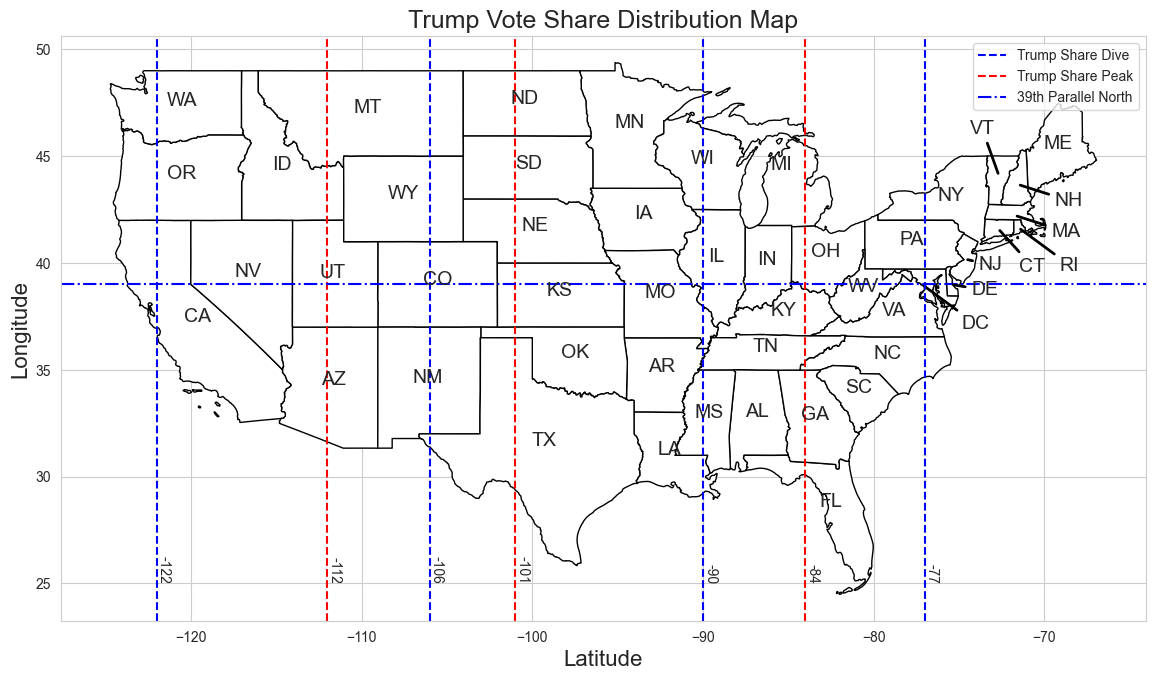

In [29]:
#generate geodataframe
usa = gpd.read_file('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/cb_2021_us_state_20m/cb_2021_us_state_20m.shp')
gpd_state = usa[~usa["NAME"].isin(["Alaska", "Hawaii", "Puerto Rico"])]
gpd_state = gpd_state.copy()
gpd_state.sort_values(by=['NAME'], ascending=True, axis=0, inplace =True)
df_state1.rename(columns={"state": "NAME"}, inplace = True)
gpd_state = pd.merge(gpd_state, df_state1, on="NAME", how="left")
#plot
fig, gax = plt.subplots(1, figsize=(14, 8))
ax = fig.add_subplot()
gpd_state.plot(ax=ax, edgecolor="black", color="white")
plt.axvline(x=-122, color='blue', linestyle='dashed', label='Trump Share Dive')
plt.legend()
plt.text(-122, 25, '-122', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-112, color='red', linestyle='dashed', label='Trump Share Peak')
plt.legend()
plt.text(-112, 25, '-112', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-106, color='blue', linestyle='dashed')
plt.text(-106, 25, '-106', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-101, color='red', linestyle='dashed')
plt.text(-101, 25, '-101', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-90, color='blue', linestyle='dashed')
plt.text(-90, 25, '-90', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-84, color='red', linestyle='dashed')
plt.text(-84, 25, '-84', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-77, color='blue', linestyle='dashed')
plt.text(-77, 25, '-77', rotation=-90, va='bottom', ha='left')
plt.axhline(y=39, color='blue', linestyle='dashdot', label='39th Parallel North')
plt.legend()
for idx, row in gpd_state.iterrows():
    name = row['STUSPS']
    if name in ['VT', 'NH', 'MA', 'RI', 'CT', 'NJ', 'MD', 'DE', 'DC']:
        coords = row.geometry.centroid.coords[0]
        if name in ['MA', 'NH', 'JE']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-1),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['VT']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]-1, coords[1]+2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['NJ']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+1.5, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['RI']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['CT']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['DE']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['DC']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
    else:
        ax.annotate(text=name, xy=row.geometry.centroid.coords[0], ha='center', fontsize=14)
gax.axis('off')
plt.title("Trump Vote Share Distribution Map", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.show()

# Project Two
## The Message
The more the electoral system is leaning towards the smaller county, the more likely Donald Trump is going to win the election.

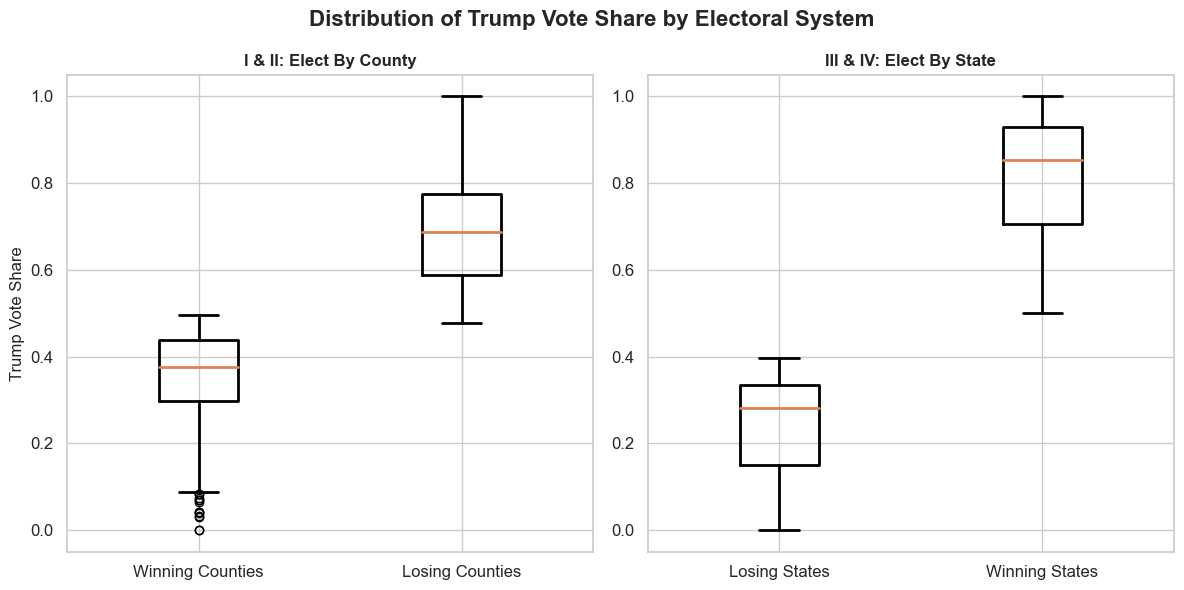

In [98]:
df_boxplot1 = pd.DataFrame({
    'share of votes in the winning counties': df_county_won['share of votes in the winning counties'],
})
df_boxplot1['Electoral Systems'] = 'share of votes in the winning counties'
df_boxplot1.rename(columns={'share of votes in the winning counties': 'Value'}, inplace=True)

df_boxplot2 = pd.DataFrame(data=df_county_lost, columns=['share of votes in the losing counties'])
df_boxplot2['Electoral Systems'] = 'share of votes in the losing counties'
df_boxplot2.rename(columns={'share of votes in the losing counties': 'Value'}, inplace=True)

df_boxplot1 = pd.concat([df_boxplot1, df_boxplot2])
df_boxplot1['Group'] = 'I & II: Elect By County'

df_boxplot3 = pd.DataFrame(data=df_state_won, columns=['share of counties in the winning states'])
df_boxplot3['Electoral Systems'] = 'share of counties in the winning states'
df_boxplot3.rename(columns={'share of counties in the winning states': 'Value'}, inplace=True)

df_boxplot4 = pd.DataFrame(data=df_state_lost, columns=['share of counties in the losing states'])
df_boxplot4['Electoral Systems'] = 'share of counties in the losing states'
df_boxplot4.rename(columns={'share of counties in the losing states': 'Value'}, inplace=True)

df_boxplot3 = pd.concat([df_boxplot3, df_boxplot4])
df_boxplot3['Group'] = 'III & IV: Elect By State'

df_boxplot = pd.concat([df_boxplot1, df_boxplot3])

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

boxprops = dict(linewidth=2)
medianprops = dict(linewidth=2)
whiskerprops = dict(linewidth=2)
capprops = dict(linewidth=2)

for i, (name, group) in enumerate(df_boxplot.groupby('Group')):
    ax = axes[i]
    group.boxplot(by='Electoral Systems', ax=ax, positions=[1, 2], widths=0.3,
                  boxprops=boxprops, medianprops=medianprops,
                  whiskerprops=whiskerprops, capprops=capprops)

    ax.set_xlabel('')

    if i == 0:
        ax.set_xticklabels(['Winning Counties', 'Losing Counties'])
        ax.set_ylabel('Trump Vote Share')
    else:
        ax.set_xticklabels(['Losing States', 'Winning States'])

    ax.set_title(name, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.suptitle('Distribution of Trump Vote Share by Electoral System', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()


Let us recall the rule of the 2 general types of electoral system defined at the beginning of this paper:

*Elect By County*: A county casts all of its votes on the party (candidate) that won the majority of votes.

*Elect By State*: A state casts all of its votes on the party (candidate) that won the majority of counties.

According to the rules, in the first general type, if a county is large enough, it has the potential of overstepping multiple small counties using its large volume of votes; whereas in the second general type, since the decision-making level is at the state, and the majority of the counties in a state are small counties, Donald Trump's victory would have been dominant.

The above two groups of boxplot showed the gap between losing and winning districts is very different between groups. In the first group, which stands for *Elect By County*, the gap between 2 50% green lines is about 0.3. However, in the second group, which stands for *Elect By State*, the gap between 2 50% green lines is almost about 0.6, doubling the gap in the first group. The larger the gap, the more overwhelming the victory.

## Maps and Interpretations
For both dataframes, remove Hawaii and Alaska out of the dataframe, to make the mainland graph more clear.

In [31]:
df_county_mainland = df_county[~df_county["state"].isin(["Alaska", "Hawaii"])]
df_state_mainland = df_state2[~df_state2["state"].isin(["Alaska", "Hawaii"])]

### Electoral System I

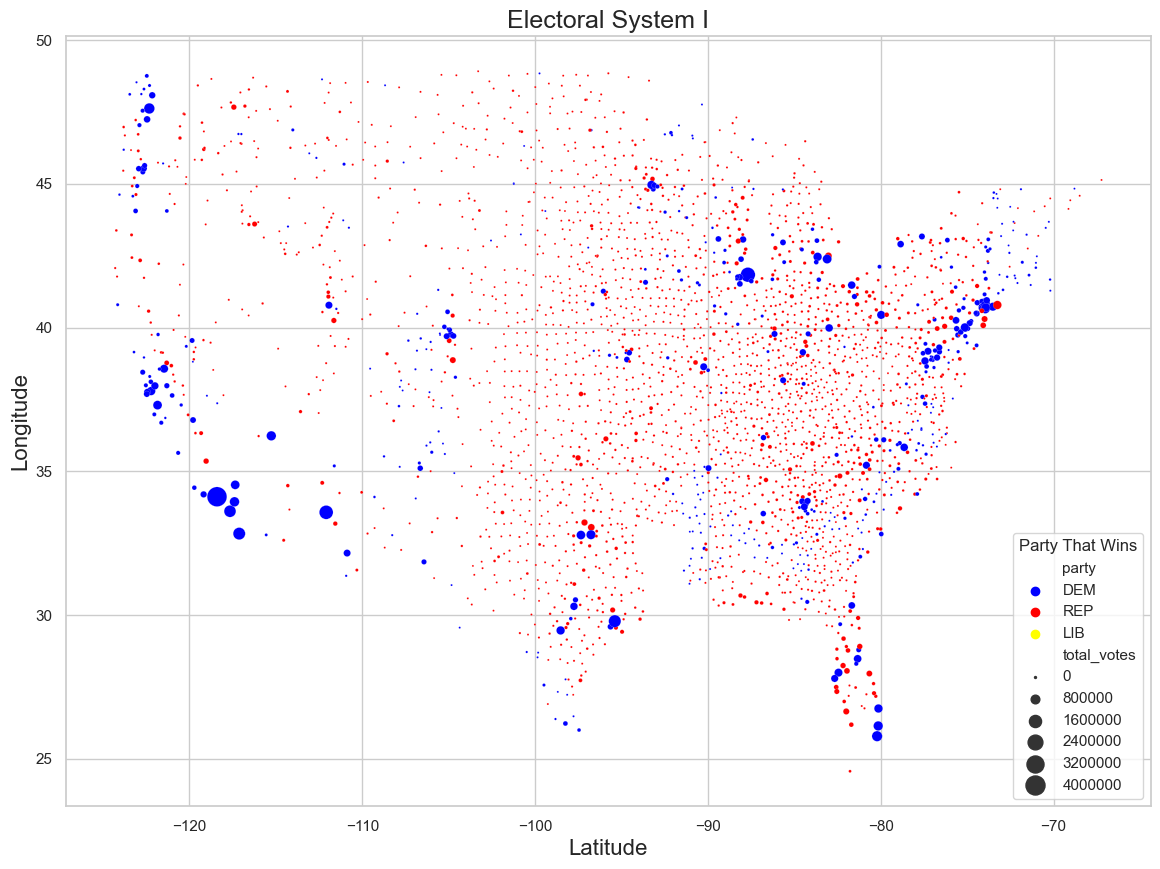

In [121]:
plt.figure(figsize = (14,10))
sns.scatterplot(data = df_county_mainland, x = "lng", y = "lat", hue = "party", size = "total_votes",
                sizes = (2, 200), palette = ['blue', 'red', 'yellow'])
plt.title("Electoral System I", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
legend_labels = plt.gca().get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Party That Wins")
    if i == 1:
        label.set_text("Democratic")
    if i == 2:
        label.set_text("Republic")
    if i == 3:
        label.set_text("Liberal")
    if i == 4:
        label.set_text("County's Total Votes")
plt.show()

In [33]:
y1 = df_county.groupby('party')['total_votes'].sum()['DEM']
y2 = df_county.groupby('party')['total_votes'].sum()['REP']
y3 = df_county.groupby('party')['total_votes'].sum()['LIB']
y4 = df_county.groupby('party')['total_votes'].sum()['WRI']
result_1 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
df_result_1 = pd.DataFrame(result_1, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])
df_result_1

,Party,Candidate,Fabricated Votes,Won
0,DEM,Joe Biden,94602377,True
1,REP,Donald Trump,64940909,False
2,LIB,Jo Jorgensen,42,False
3,WRI,Write-ins,64909,False


Under this system, each county has the same number of votes as its number of voters and casts all of its votes on the party (candidate) that won the majority of votes. In this scenario, Joe Biden emerged as the winner. This can be attributed to the fact that Biden was able to secure the majority of votes in a number of megacities, thereby gaining a significant number of electoral votes. Although Trump won large number of counties, the population still doesn't add up to the level of the population from megacities, therefore he lost.

### Electoral System II

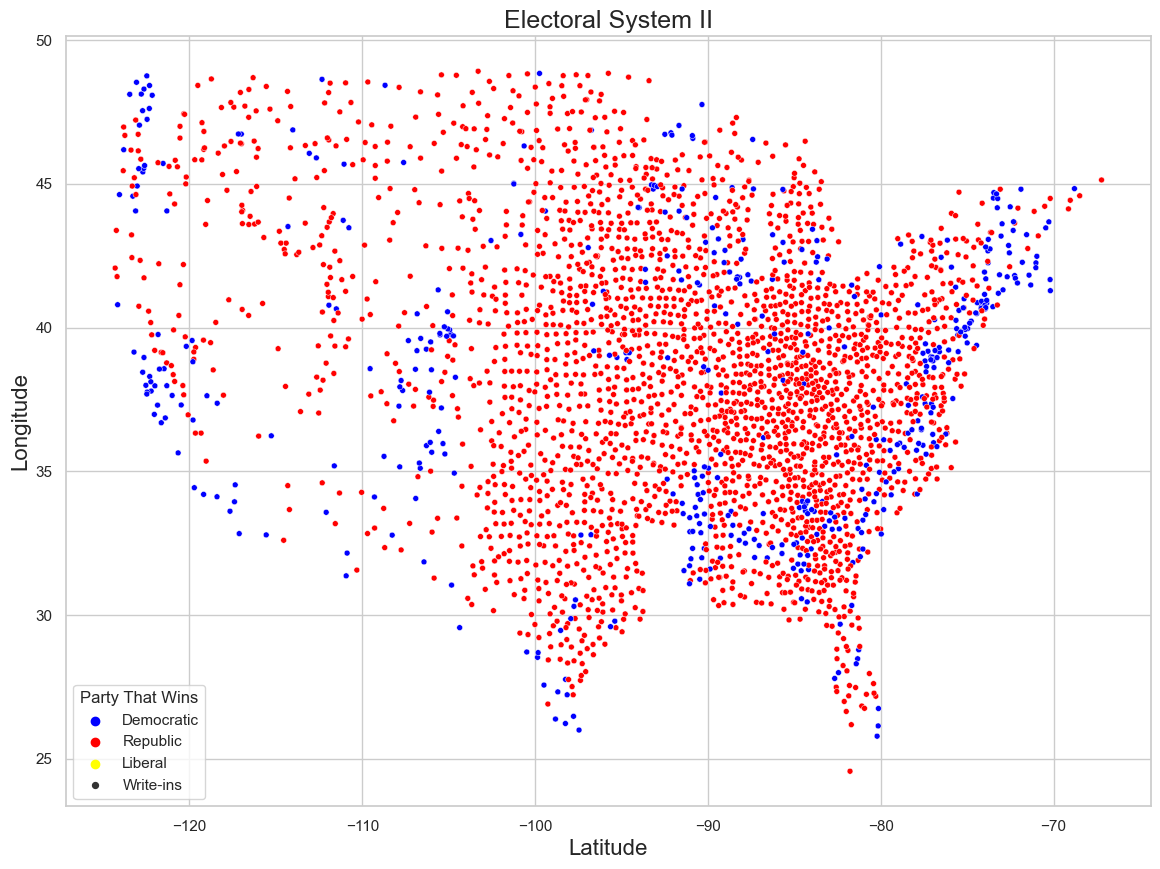

In [111]:
plt.figure(figsize = (14,10))
sns.scatterplot(data = df_county_mainland, x = "lng", y = "lat", hue = "party", size = 20, palette = ['blue', 'red', 'yellow'])
plt.title("Electoral System II", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.legend(title='Party That Wins', loc='lower right')
legend_labels = plt.gca().get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Democratic")
    if i == 1:
        label.set_text("Republic")
    if i == 2:
        label.set_text("Liberal")
    if i == 3:
        label.set_text("Write-ins")
plt.show()

In [35]:
y1 = df_county['party'].value_counts()['DEM']
y2 = df_county['party'].value_counts()['REP']
y3 = df_county['party'].value_counts()['LIB']
y4 = df_county['party'].value_counts()['WRI']
result_2 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
df_result_2 = pd.DataFrame(result_2, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])
df_result_2

,Party,Candidate,Fabricated Votes,Won
0,DEM,Joe Biden,1409,False
1,REP,Donald Trump,3220,True
2,LIB,Jo Jorgensen,1,False
3,WRI,Write-ins,3,False


Under this system, each county has only one vote and casts its vote on the party (candidate) that won the majority of votes, therefore all the dots are of the same size. Donald Trump emerged as the winner under this system. Since all counties are weighted equally, the fact that Trump is popular with small counties and in several smaller counties, enabled him to secure a majority. Trump's performance in states that traditionally vote Republican has also contributed to his win.

### Electoral System III

In [37]:
df_state3 = df_state2.copy()
df_state3.drop_duplicates(subset = ['state'], keep = 'first', inplace = True)
df_state3.drop(['county', 'total_votes', 'won', 'lat', 'lng', 'candidate', '# of counties won'], axis = 1, inplace = True)
df_state3 = df_state3[~df_state3["state"].isin(["Alaska", "Hawaii"])]
df_ps_copy = df_ps.copy()
df_state_vote = pd.merge(df_state3, df_ps_copy, on='state', how='left')
df_state_vote.rename(columns={"state": "NAME"}, inplace = True)
gpd_state = pd.merge(gpd_state, df_state_vote, on=['NAME', 'party'], how='left')

,state,party
0,Delaware,DEM
3,District of Columbia,DEM
11,Florida,REP
78,Georgia,REP
241,Idaho,REP


/var/folders/ww/ygv9855j1kg902lgct5j96840000gn/T/ipykernel_26270/496193990.py:59: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gax.set_xticks(gpd_state.geometry.centroid.x)
/var/folders/ww/ygv9855j1kg902lgct5j96840000gn/T/ipykernel_26270/496193990.py:60: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gax.set_yticks(gpd_state.geometry.centroid.y)


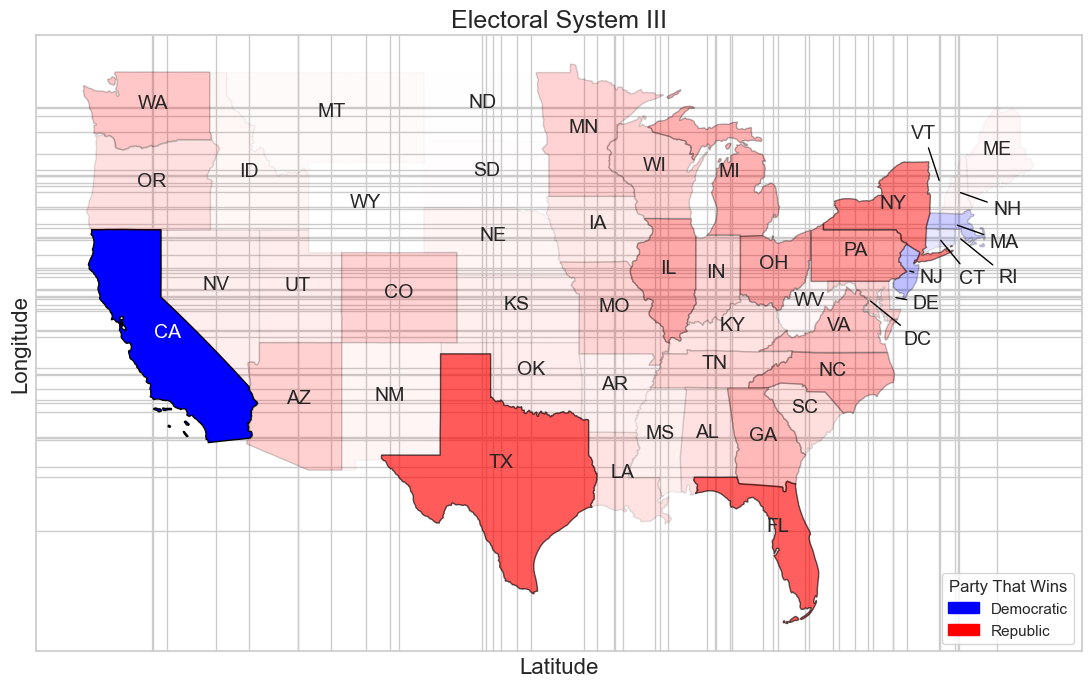

In [131]:
fig, gax= plt.subplots(figsize=(14, 8))

# Define color mapping
colors = {'DEM': 'blue', 'REP': 'red'}

# Define minimum and maximum values for color scale
vmin = gpd_state['total_votes'].min()
vmax = gpd_state['total_votes'].max()

# Plot each state with the appropriate color and shade
for index, row in gpd_state.iterrows():
    color = colors.get(row['party'], 'gray')
    total_votes = row['total_votes']
    shade = (total_votes - vmin) / (vmax - vmin)
    gpd_state[gpd_state.index == index].plot(ax=gax, color=color, edgecolor='black', linewidth=1, alpha=shade)

# Add legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]
labels = colors.keys()
gax.legend(handles, labels, loc='lower right')

# Remove axis ticks and labels
gax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)


for idx, row in gpd_state.iterrows():
    name = row['STUSPS']
    if name in ['VT', 'NH', 'MA', 'RI', 'CT', 'NJ', 'MD', 'DE', 'DC', 'CA']:
        coords = row.geometry.centroid.coords[0]
        if name in ['MA', 'NH', 'JE']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-1),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['VT']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]-1, coords[1]+2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['NJ']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+1.5, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['RI', 'DC']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['CT']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['DE']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['CA']:
            gax.annotate(text=name, xy=row.geometry.centroid.coords[0], ha='center', fontsize=14, color = 'white')
    else:
        gax.annotate(text=name, xy=row.geometry.centroid.coords[0], ha='center', fontsize=14)

# Set plot title
plt.title("Electoral System III", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})

# Set x and y ticks to display the longitude and latitude values respectively
gax.set_xticks(gpd_state.geometry.centroid.x)
gax.set_yticks(gpd_state.geometry.centroid.y)

# Add state abbreviation as tick labels
gax.set_xticklabels(gpd_state.STUSPS)
gax.set_yticklabels(gpd_state.STUSPS)

# Remove tick lines
gax.tick_params(axis='both', length=0)

# Add legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]
labels = ['Democratic', 'Republic']
legend = gax.legend(handles, labels, loc='lower right')

# Set legend title
legend.set_title("Party That Wins")

# Show plot
plt.show()


In [ ]:
y1 = df_state2.groupby('party')['total_votes'].sum()['DEM']
y2 = df_state2.groupby('party')['total_votes'].sum()['REP']
try:
    y3 = df_state2.groupby('party')['total_votes'].sum()['LIB']
except KeyError:
    y3 = 0
try:
    y4 = df_state2.groupby('party')['total_votes'].sum()['WRI']
except KeyError:
    y4 = 0
result_3 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
df_result_3 = pd.DataFrame(result_3, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])
df_result_3

Under this system, each state has the same number of votes as its number of voters and casts all of its votes on the party (candidate) that won the majority of counties. Donald Trump emerged as the winner under this system. Since the number of counties where Trump is popular surpasses the number of cities where Biden is popular in almost every state, except for certain states that are Democrat's conservative base. In the general case, the higher number of rural counties in most states where Trump performed well played a crucial role in his win.

### Electoral System IV

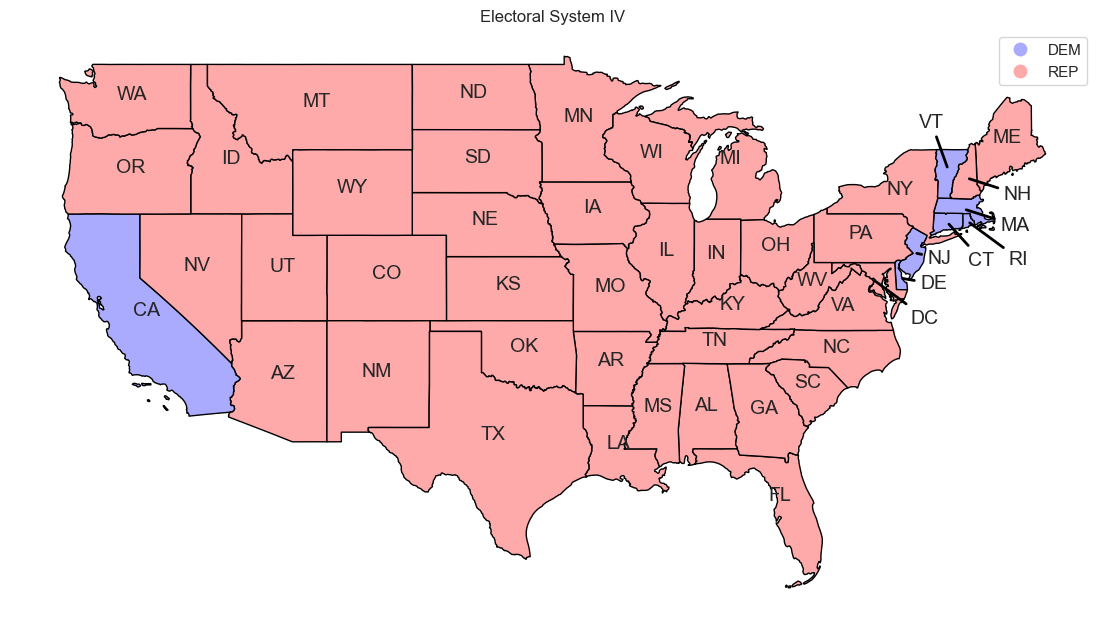

In [124]:
fig, gax= plt.subplots(1, figsize = (14,8))
ax = fig.add_subplot()
gpd_state.plot(
    ax=ax, edgecolor='black', column='party', legend=True, cmap='bwr', categorical=True, vmin=-1, vmax=2)
for idx, row in gpd_state.iterrows():
    name = row['STUSPS']
    if name in ['VT', 'NH', 'MA', 'RI', 'CT', 'NJ', 'MD', 'DE', 'DC']:
        coords = row.geometry.centroid.coords[0]
        if name in ['MA', 'NH', 'JE']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-1),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['VT']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]-1, coords[1]+2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['NJ']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+1.5, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['RI']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['CT']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['DE']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['DC']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
    else:
        ax.annotate(text=name, xy=row.geometry.centroid.coords[0], ha='center', fontsize=14)
plt.title("Electoral System IV", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.show()

In [ ]:
y1 = df_state1['party'].value_counts()['DEM']
y2 = df_state1['party'].value_counts()['REP']
try:
    y3 = df_state1['party'].value_counts()['LIB']
except KeyError:
    y3 = 0
try:
    y4 = df_state1['party'].value_counts()['WRI']
except KeyError:
    y4 = 0
result_4 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
df_result_4 = pd.DataFrame(result_4, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])
df_result_4

### Summary of Four Electoral Systems

In [ ]:
result = df_result_1.copy()
result.drop(['Candidate', 'Won'], axis = 1, inplace = True)
result.rename(columns={"Fabricated Votes": "I"}, inplace = True)
result = result.T
new_header = result.iloc[0]
result = result[1:]
result.columns = new_header

result_add = df_result_2.copy()
result_add.drop(['Candidate', 'Won'], axis = 1, inplace = True)
result_add.rename(columns={"Fabricated Votes": "II"}, inplace = True)
result_add = result_add.T
new_header = result_add.iloc[0]
result_add = result_add[1:]
result_add.columns = new_header
result = pd.concat([result, result_add])

result_add = df_result_3.copy()
result_add.drop(['Candidate', 'Won'], axis = 1, inplace = True)
result_add.rename(columns={"Fabricated Votes": "III"}, inplace = True)
result_add = result_add.T
new_header = result_add.iloc[0]
result_add = result_add[1:]
result_add.columns = new_header
result = pd.concat([result, result_add])

result_add = df_result_4.copy()
result_add.drop(['Candidate', 'Won'], axis = 1, inplace = True)
result_add.rename(columns={"Fabricated Votes": "IV"}, inplace = True)
result_add = result_add.T
new_header = result_add.iloc[0]
result_add = result_add[1:]
result_add.columns = new_header
result = pd.concat([result, result_add])

result

In [ ]:
stacked_data = result.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, color = ['blue', 'red', 'yellow', 'grey'])
plt.title("Final Result of All Four Electoral Systems")
plt.xlabel("Electoral System")
plt.ylabel("Percentage Fabricated Vote of Parties (%)")
plt.show()

As from the above bar graph, the advantage Trump obtained in each of the electoral system is gradually increasing from the first one to the last one. This is because the weight small counties carry is increasing from left to right. It goes back to the message that Trump is favored by the people living in smaller counties, and if such group is given more weight, the likelihood of Trump winning the election will also increase.

# Project Three
## Potential Data to Scrape
One potential addition to the campaign spending data by candidate and state in the 2020 US presidential election dataset could be web scraping data on political action committee (PAC) spending. PACs are organizations that raise and spend money to support or oppose political candidates or issues. By scraping data on PAC spending, we could gain insights into which outside groups were spending money to support or oppose the candidates in various states.

One potential website to scrape this data from is OpenSecrets.org, which is a website that tracks money in politics. OpenSecrets.org provides data on PAC spending by candidate and by state, as well as information on which industries and interest groups are donating money to PACs. This data could help shed light on which groups were most active in trying to influence the election in various states.

To merge this data with our existing dataset on campaign spending, we could use state and candidate identifiers to match the PAC spending data to the relevant states and candidates in our dataset. We could then use this new information to help answer my research question by looking at how PAC spending may have influenced the outcomes in various states and how this may have affected the overall results of the election.

## Potential Challenges
Thirdly, the website may not provide all of the data that we need in a single location or in a format that is easy to scrape. We may need to scrape data from multiple pages or even multiple websites to gather all of the relevant information.

Finally, merging the scraped data with our existing dataset may require some data cleaning and matching. The scraped data may use different identifiers or formats than our existing dataset, which could require some additional data wrangling.


## Scraping Data from a Website
Website of choice: https://www.opensecrets.org/2020-presidential-race/sector-totals



In [139]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [221]:
sectors = ['Agribusiness', 'Communications/Electronics', 'Construction', 'Defense', 'Energy/Natural Resources', 'Finance/Insurance/Real Estate', 'Health', 'Lawyers & Lobbyists', 'Transportation', 'Misc Business', 'Labor', 'Ideology/Single-Issue', 'Other']

sector_totals = ['https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=A',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=B',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=C',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=D',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=E',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=F',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=H',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=K',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=M',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=N',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=P',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=Q',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=W']

sector_campaign_committee = ['https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=A&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=B&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=C&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=D&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=E&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=F&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=H&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=K&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=M&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=N&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=P&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=Q&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=W&src=c']

sector_outside_groups = ['https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=A&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=B&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=C&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=D&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=E&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=F&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=H&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=K&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=M&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=N&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=P&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=Q&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=W&src=o']

sector_fund = [sector_totals, sector_campaign_committee, sector_outside_groups]

In [294]:
df_funds = list()
for fund in sector_fund:
    df_total_lists = []
    for i in range(len(sectors)):
        totals = fund[i]
        response = requests.get(totals)

        soup_object = BeautifulSoup(response.content, 'html.parser')

        data_table = soup_object.find_all('table', 'DataTable')[0]

        all_values = data_table.find_all('tr')

        df_fund = pd.DataFrame(columns = ['Candidate', sectors[i]])
        ix = 0

        for row in all_values[1:]:
            values = row.find_all('td')

            candidate = values[0].text
            total = values[1].text

            df_fund.loc[ix] = [candidate, total]
            ix += 1

        df_total_lists.append(df_fund)

    # perform left join on Candidate column
    df_sector_totals = df_total_lists[0]
    for df in df_total_lists[1:]:
        df_sector_totals = pd.merge(df_sector_totals, df, on='Candidate', how='left')

    df_funds.append(df_sector_totals)

In [295]:
import re

# Change the datatype from object to integer, to prepare for the plotting
df_funds_copy = df_funds.copy()
for df in df_funds:
    for col in df.columns[1:]:
        df[col] = df[col].apply(lambda x: int(re.sub(r'\D', '', str(x))) if str(x) != 'nan' else 0)

# Count entries in the first dataframe (total funding for sectors)
df_funds[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Candidate                      33 non-null     object
 1   Agribusiness                   33 non-null     int64 
 2   Communications/Electronics     33 non-null     int64 
 3   Construction                   33 non-null     int64 
 4   Defense                        33 non-null     int64 
 5   Energy/Natural Resources       33 non-null     int64 
 6   Finance/Insurance/Real Estate  33 non-null     int64 
 7   Health                         33 non-null     int64 
 8   Lawyers & Lobbyists            33 non-null     int64 
 9   Transportation                 33 non-null     int64 
 10  Misc Business                  33 non-null     int64 
 11  Labor                          33 non-null     int64 
 12  Ideology/Single-Issue          33 non-null     int64 
 13  Other  

## Merging the Scraped Dataset
The previous results achieved in Project 1 and 2 are mostly discussing the vote on a geographical level. Since I introduced a new dimension - sector - in this section, it is not very suitable for merging the datasets together.

Up to this point, we have three dataframes of the same size, the total # of observations from the webscrapping is 33*14*3 = 1386

## Visualizing the Scraped Dataset

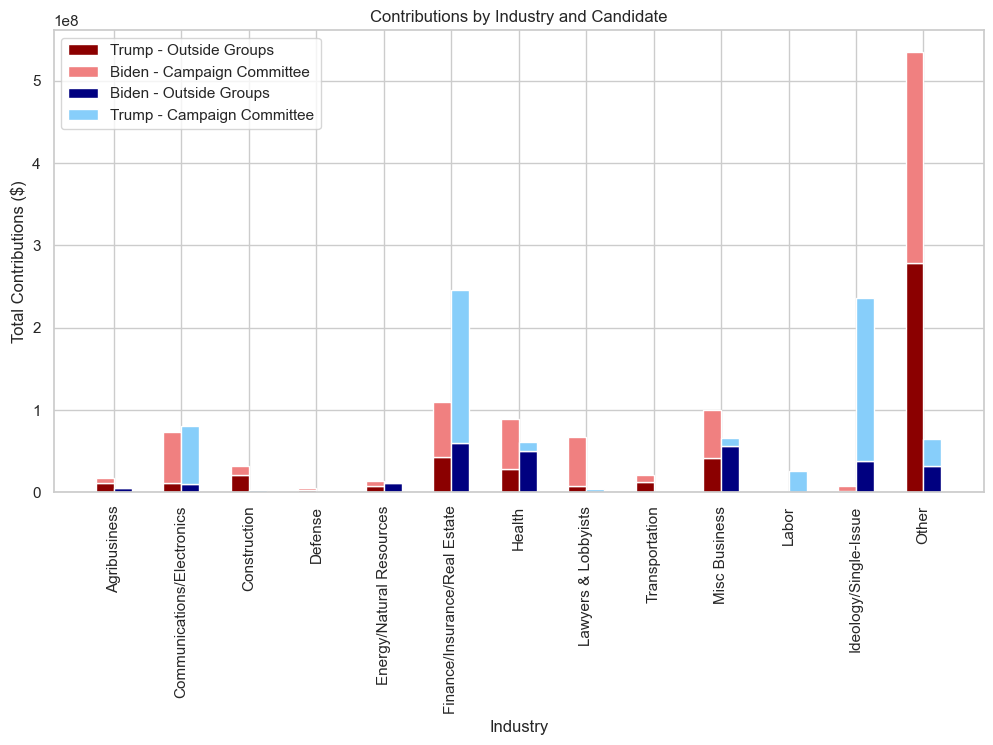

In [297]:
# Loading dataframes
df0 = df_funds[0].copy()
df1 = df_funds[1].copy()
df2 = df_funds[2].copy()

# define the column groups
groups = ['Agribusiness', 'Communications/Electronics', 'Construction', 'Defense', 'Energy/Natural Resources',
          'Finance/Insurance/Real Estate', 'Health', 'Lawyers & Lobbyists', 'Transportation', 'Misc Business',
          'Labor', 'Ideology/Single-Issue', 'Other']

# define the two candidates
candidates = ['Trump, Donald (R)', 'Biden, Joe (D)']

# define the x-axis positions for each group of bars
x_positions = np.arange(len(groups)) * 3

# define the bar width
bar_width = 0.8

# create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# define the labels for the legend
labels = ['Trump - Campaign Committee', 'Trump - Outside Groups', 'Biden - Campaign Committee', 'Biden - Outside Groups']

# loop over each group of columns
for i in range(1, df1.shape[1]):

    # get the data for this group from the two dataframes
    data1 = np.array([df1.loc[df1['Candidate'] == 'Trump, Donald (R)', df_funds[1].columns[i]].values[0],
                      df1.loc[df1['Candidate'] == 'Biden, Joe (D)', df_funds[1].columns[i]].values[0]])
    data2 = np.array([df2.loc[df2['Candidate'] == 'Trump, Donald (R)', df_funds[2].columns[i]].values[0],
                      df2.loc[df2['Candidate'] == 'Biden, Joe (D)', df_funds[2].columns[i]].values[0]])

    # calculate the x-axis positions for the two bars in this group
    x_pos_left = x_positions[i - 1] - bar_width / 2
    x_pos_right = x_positions[i - 1] + bar_width / 2

    # plot the bars for the two candidates, stacked on top of each other
    ax.bar(x_pos_left, data1[0], width=bar_width, label=labels[0], color='darkred')
    ax.bar(x_pos_left, data1[1], width=bar_width, bottom=data1[0], color='lightcoral')
    ax.bar(x_pos_right, data2[0], width=bar_width, label=labels[2], color='navy')
    ax.bar(x_pos_right, data2[1], width=bar_width, bottom=data2[0], color='lightskyblue')

    # shift the label index
    labels = labels[1:] + labels[:1]

# set the x-axis tick labels to be the group names
ax.set_xticks(x_positions)
ax.set_xticklabels(groups, rotation=90)

# set the legend parameters
ax.legend(labels=labels, loc='upper left', title=None)

# set the axis labels and title
ax.set_xlabel('Industry')
ax.set_ylabel('Total Contributions ($)')
ax.set_title('Funding by Industry and Candidate')

# show the plot
plt.show()


In [325]:
# Selecting needed rows from dataframes
trump_cc = pd.DataFrame(df1.iloc[0]).transpose()
trump_og = pd.DataFrame(df2.iloc[0]).transpose()
trump_c = pd.DataFrame(df0.iloc[0]).transpose()
biden_cc = pd.DataFrame(df1.iloc[1]).transpose()
biden_og = pd.DataFrame(df2.iloc[1]).transpose()
biden_c = pd.DataFrame(df0.iloc[1]).transpose()

# Combining all the rows to one dataframe
stacked_df = pd.concat([trump_cc, trump_og, trump_c, biden_cc, biden_og, biden_c], axis=0)
stacked_df['Candidate'] = ['Trump - Campaign Committee', 'Trump - Outside Groups', 'Trump - Combined', 'Biden - Campaign Committee', 'Biden - Outside Groups', 'Biden - Combined']
stacked_df.set_index('Candidate', inplace=True)
stacked_df = stacked_df.transpose()
stacked_df = stacked_df.reset_index().rename(columns={'index': 'Industry'})

# define a formatting function
def add_commas(val):
    if isinstance(val, int):
        if abs(val) >= 1000000:
            return '{:,.0f}'.format(val)
        elif abs(val) >= 1000:
            return '{:,.0f}'.format(val)
        else:
            return '{:.2f}'.format(val)
    else:
        return val

# apply the formatting function to columns 1 to 6
stacked_df.iloc[:, 1:7] = stacked_df.iloc[:, 1:7].applymap(add_commas)

# create function to compare and add asterisk
def add_asterisk(row):
    # compare columns 2 and 5
    if row[1] > row[4]:
        row[1] = str(row[1]) + '*'
    else:
        row[4] = str(row[4]) + '*'

    # compare columns 3 and 6
    if row[2] > row[5]:
        row[2] = str(row[2]) + '*'
    else:
        row[5] = str(row[5]) + '*'

    # compare columns 4 and 7
    if row[3] > row[6]:
        row[3] = str(row[3]) + '*'
    else:
        row[6] = str(row[6]) + '*'

    return row

# apply function to each row of dataframe
stacked_df = stacked_df.apply(add_asterisk, axis=1)

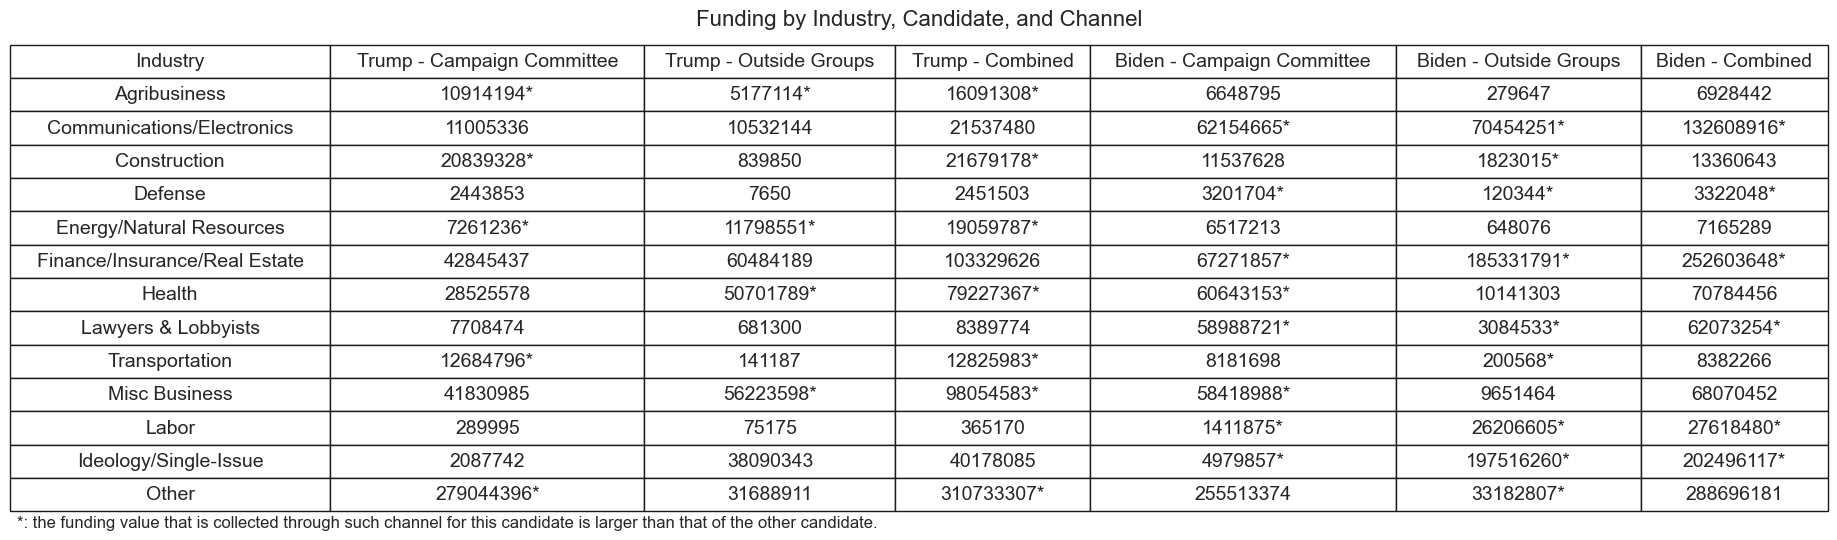

In [344]:
# create a figure and axis
fig, ax = plt.subplots()

# hide axis
ax.axis('off')

# create the table using the data in the dataframe
table = ax.table(cellText=stacked_df.values, colLabels=stacked_df.columns, loc='center', cellLoc='center')

# set the font size of the cells and header
table.set_fontsize(14)
table.auto_set_column_width(col=list(range(len(stacked_df.columns))))

# Set the height of the cells
table.scale(1, 2)

# Set the title of the table
title = 'Funding by Industry, Candidate, and Channel'
plt.text(0, 0.08, title, ha='center', va='top', fontsize=16)

# Hide the axis and turn off the axis lines and ticks
ax.axis('off')
ax.axis('tight')

# add note below the plot
note = "*: the funding value that is collected through such channel for this candidate is larger than that of the other candidate."
plt.text(-0.2, -0.075, note, ha='left', va='bottom', fontsize=12)

# Show the plot
plt.show()

Another graph: pie chart of Trump and Biden









## Adding a New Dataset
New Dataset: https://www.kaggle.com/datasets/noriuk/us-education-datasets-unification-project?resource=download&select=states_all.csv

In [ ]:
df_ = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/2019_Education_Dataset.csv')
df_.head()

## Conclusion
In conclusion, the results of the four different electoral systems applied to the same election data reveal the significance of the electoral process in determining the outcome of an election. The outcome can vary greatly depending on the specific system being used. In this case, Joe Biden was declared the winner under Electoral System I, where each county was allotted the same number of votes as its number of voters and all votes were cast for the candidate who won the majority of votes in that county. On the other hand, Donald Trump was declared the winner in the remaining three systems - Electoral System II, III, and IV.

In [ ]:
result_4 = [['I', 'Joe Biden'],
            ['II', 'Donald Trump'],
            ['III', 'Donald Trump'],
            ['IV', 'Donald Trump']]
pd.DataFrame(result_4, columns = ['Electoral System', 'Winner'])

 This highlights the importance of choosing an appropriate electoral system that aligns with the values and goals of a given society. It also demonstrates how different electoral systems can have a significant impact on the representation of different regions, communities, and individuals. The analysis shows that the design of an electoral system can greatly influence the outcome of an election and should be carefully considered.